# 1. GEREKLİ KÜTÜPHANELERİ YÜKLEME

### Bu adımda, TensorFlow, OpenCV, NumPy, Matplotlib ve diğer gerekli kütüphaneleri projemize dahil ediyoruz. 
### Bu kütüphaneler sırasıyla:
- **TensorFlow**: Derin öğrenme modeli oluşturmak ve eğitmek için.
- **OpenCV**: Görüntü işleme için.
- **NumPy**: Çok boyutlu dizi işlemleri ve matematiksel hesaplamalar için.
- **Matplotlib**: Grafik oluşturma ve veri görselleştirme için.
- **Scikit-learn**: Veri ayrımı (train-test split) ve diğer makine öğrenmesi araçları için.
- **os, shutil, random**: Dosya işlemleri ve rastgele veri seçimi için.

### Tensorflow kütüphanesinden kullanılan modüller ve sınıflar:
- **tensorflow.keras.models.Sequential**: Modelin katmanlarını sırasıyla eklemek için kullanılan Sequential API. Bu modelde katmanlar, bir öncekine bağlı olarak sıralı bir şekilde eklenir.
- **tensorflow.keras.preprocessing.image.ImageDataGenerator**: Görüntü verisi üzerinde veri artırma (data augmentation) işlemleri yapmak için kullanılır. Bu, modelin daha genellenebilir hale gelmesine yardımcı olur.
- **tensorflow.keras.layers.Conv2D**: Konvolüsyonel katman (Convolutional Layer), modelin görüntüleri analiz etmesini sağlar ve görüntüdeki özellikleri öğrenir.
- **tensorflow.keras.layers.MaxPooling2D**: Maksimum havuzlama (Max Pooling) katmanı, konvolüsyonel katmanlardan sonra gelen boyutları küçültme işleminde kullanılır.
- **tensorflow.keras.layers.Flatten**: Konvolüsyonel katmanların çıktısını düzleştirerek tamamen bağlı (fully connected) katmanlara aktarır.
- **tensorflow.keras.layers.Dense**: Tam bağlı katman (Fully Connected Layer), modelin öğrenmesini sağlayan katmandır.
- **tensorflow.keras.layers.Dropout**: Aşırı uyum (overfitting) sorununu engellemek için kullanılan katman. Eğitim sırasında belirli bir oranla nöronları rastgele devre dışı bırakır.
- **tensorflow.keras.layers.BatchNormalization**: Her katmandan sonra, girişlerin daha stabil hale gelmesi için kullanılan normalizasyon işlemi.
- **tensorflow.keras.layers.Activation**: Aktivasyon fonksiyonlarını (örneğin ReLU, Softmax vb.) ekler. Bu fonksiyonlar, modelin doğrusal olmayan özellikleri öğrenmesini sağlar.
- **tensorflow.keras.callbacks.EarlyStopping**: Modelin eğitim süresince, doğrulama hatasında iyileşme olmadığında erken durdurma işlemi yapar. Bu, aşırı uyumu önlemeye yardımcı olur.


In [1]:
# TensorFlow ve gerekli diğer kütüphaneler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# OpenCV ve temel kütüphaneler
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Train-test split için
from sklearn.model_selection import train_test_split

#Dosya işlemleri
import os
import shutil
import random 

# 2. YENİ VERİ SETİNİN OLUŞTURULMASI

### 2.1. Veri Seti Yolunun Belirlenmesi ve Sınıf Seçimi
Bu adımda, veri setinin bulunduğu klasör yolu ve yeni veri setinin oluşturulacağı klasör yolu belirlenmiştir. Ayrıca, hangi sınıfların kullanılacağı ve her sınıf için kaç resim kullanılacağı belirlenmiştir.

- **dataset_path**: Orijinal veri setinin bulunduğu dizin.
- **output_path**: Yeniden düzenlenmiş veri setinin oluşturulacağı yeni dizin.
- **selected_classes**: Çalışmada kullanılacak hayvan sınıflarının listesi. Burada "collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda" ve "polar+bear" sınıfları seçilmiştir.
- **max_images_per_class**: Her sınıftan alınacak maksimum resim sayısı (650).


In [2]:

# Veri seti yolunu belirleyin
dataset_path = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"  # Veri setinin bulunduğu klasör
output_path = "/kaggle/working/selected-classes"  # Yeni veri setinin oluşturulacağı yer

selected_classes = [ "collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

# Parametreler
max_images_per_class = 650  # Her sınıf için kullanılacak maksimum resim sayısı

# Yeni klasör yapısını oluşturma
if not os.path.exists(output_path):
    os.makedirs(output_path)

for class_name in selected_classes:
    class_folder = os.path.join(output_path, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    class_images = os.listdir(os.path.join(dataset_path, class_name))[:max_images_per_class]  # Her sınıfın ilk 650 resmi seçilir

    for image_name in class_images:
            image_path = os.path.join(dataset_path, class_name, image_name)
            
            # Resmi yükle
            img = cv2.imread(image_path)
            
            # Resmi yeniden boyutlandır
            img_resized = cv2.resize(img, (224, 224))  # Yeni boyut (224x224)
    
            # Yeni hedef yolu belirle
            target_path = os.path.join(class_folder, image_name)
            
            # Yeniden boyutlandırılmış resmi yeni klasöre kaydet
            cv2.imwrite(target_path, img_resized)


print("Resimler başarıyla kopyalandı! Yeni veri seti hazır.")

Resimler başarıyla kopyalandı! Yeni veri seti hazır.


### 2.2. Klasörlerin Adları ve Eleman Sayılarının Kontrolü
Bu adımda, yeni oluşturduğumuz veri setindeki her bir sınıfın bulunduğu klasörü kontrol ediyoruz ve her sınıftaki resim sayısını yazdırıyoruz.

- **os.listdir(output_path)**: `output_path` klasöründeki tüm dosya ve klasörlerin adlarını listeleyen fonksiyondur.
- **os.path.isdir(class_folder)**: Bu, her bir öğenin klasör olup olmadığını kontrol eder. Eğer öğe bir klasörse, içindeki dosya sayısı hesaplanır.
- **len(os.listdir(class_folder))**: Her bir sınıfın içindeki resimlerin sayısını hesaplar.

Bu işlem, her bir sınıfın veri setinde kaç resim bulunduğunu belirlemek ve veri setinin düzgün oluşturulup oluşturulmadığını doğrulamak için önemlidir.


In [3]:
# Klasörlerin adları ve eleman sayıları
for class_name in os.listdir(output_path):
    class_folder = os.path.join(output_path, class_name)
    if os.path.isdir(class_folder):
        num_files = len(os.listdir(class_folder))
        print(f"Class: {class_name}, Number of Images: {num_files}")

Class: elephant, Number of Images: 650
Class: dolphin, Number of Images: 650
Class: collie, Number of Images: 650
Class: sheep, Number of Images: 650
Class: rabbit, Number of Images: 650
Class: fox, Number of Images: 650
Class: polar+bear, Number of Images: 650
Class: moose, Number of Images: 650
Class: squirrel, Number of Images: 650
Class: giant+panda, Number of Images: 650


### Çıktı Analizi
Bu adımda, her sınıf için oluşturulan klasörlerdeki resim sayıları başarıyla yazdırıldı. Bu, yeni veri setinin her sınıfı için seçilen resimlerin doğru şekilde yerleştirildiğini ve her sınıfın belirlenen maksimum sayıda (650) resim içerdiğini doğrulamak için kullanıldı.

### Her Sınıf İçin Birer Örnek Görüntüyü Gösterme
Bu adımda, daha önce oluşturduğumuz veri setindeki her sınıf için birer örnek görüntü gösterilmektedir. Her sınıfın ilk resmi seçilir, boyutları alınır ve görselleştirilir.

- **class_folder**: Seçilen sınıfın klasör yoludur.
- **os.listdir(class_folder)**: Bu, her sınıf klasöründeki tüm dosyaların listesini alır.
- **cv2.imread(image_path)**: Görüntüyü yüklemek için OpenCV'nin `imread` fonksiyonu kullanılır.
- **img.shape**: Görüntünün boyutları (yükseklik, genişlik) alınır.
- **cv2.cvtColor(img, cv2.COLOR_BGR2RGB)**: OpenCV görüntüsünün renk uzayını (BGR'den RGB'ye) dönüştürür. Matplotlib RGB formatında görüntüleri işler.
- **plt.imshow(img_rgb)**: Görüntüyü matplotlib ile görselleştiririz.
- **plt.title()**: Görselin başlığına, sınıf adı ve boyut bilgisi eklenir.

Bu işlem, her sınıfın ilk resminin doğru şekilde işlendiğini ve görüntülerin uygun boyutta olduğunu doğrulamak için kullanılır.


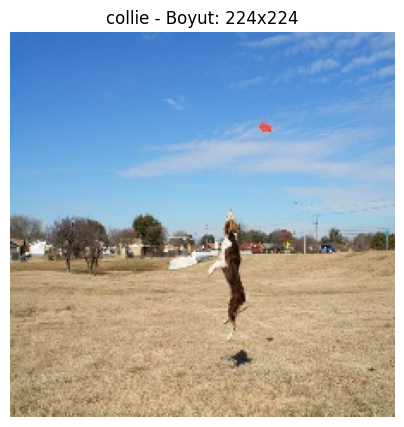

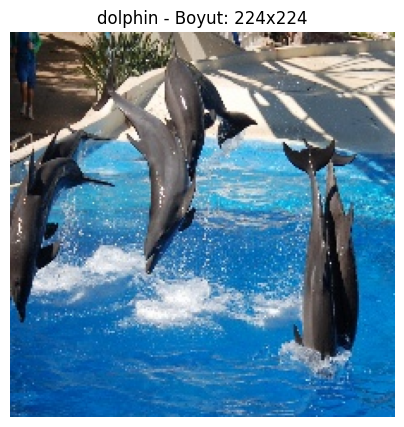

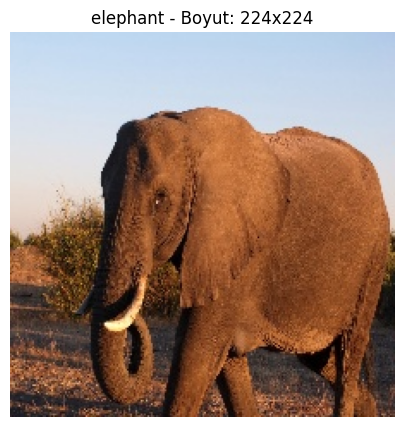

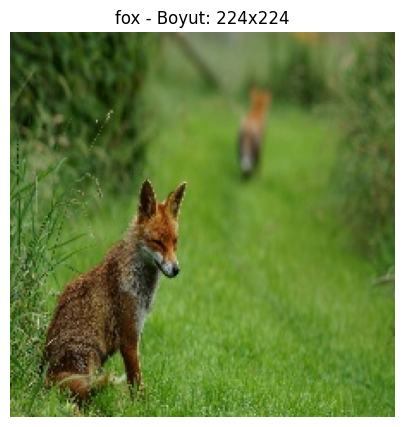

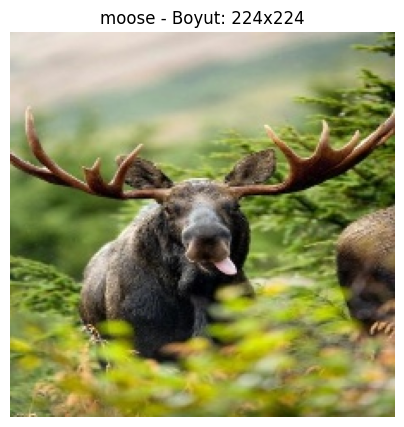

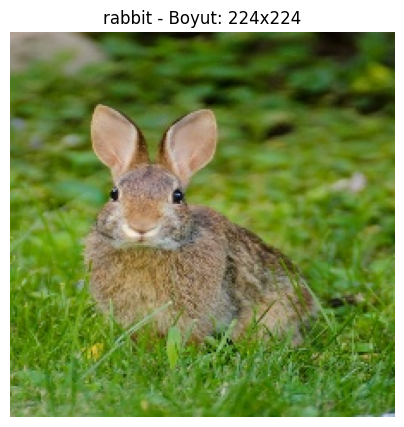

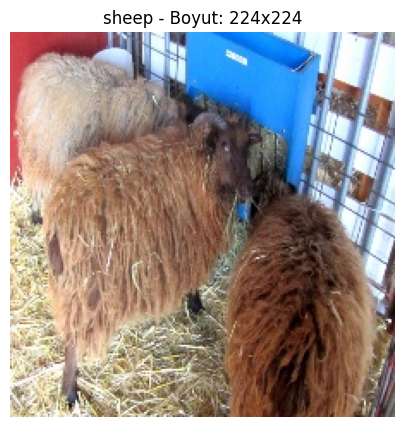

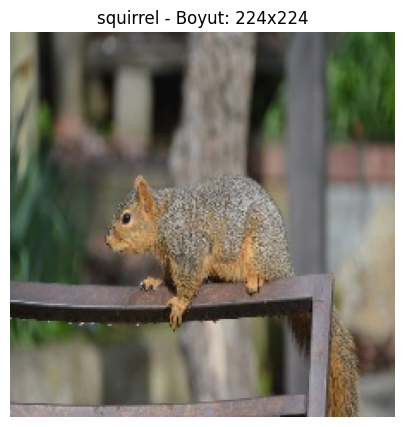

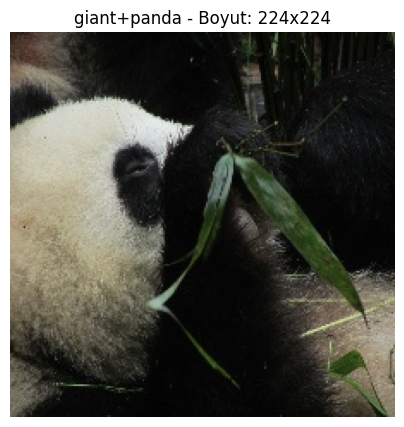

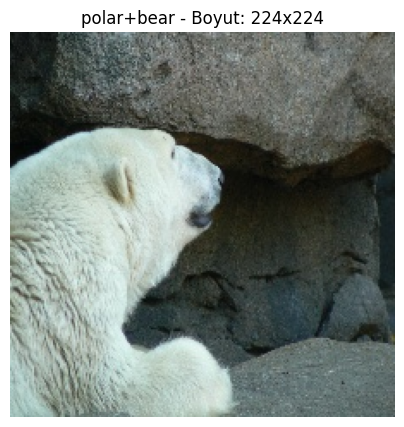

In [4]:
# Her sınıf için birer örnek görüntüyü göster
for class_name in selected_classes:
    class_folder = os.path.join(output_path, class_name)
    
    # İlk resmi seç
    class_images = os.listdir(class_folder)
    first_image = class_images[0]
    
    # Görseli yükle
    image_path = os.path.join(class_folder, first_image)
    img = cv2.imread(image_path)
    
    # Görselin boyutunu al
    img_height, img_width, _ = img.shape
    
    # BGR'den RGB'ye dönüştür (Matplotlib için)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Görseli görüntüle
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(f"{class_name} - Boyut: {img_width}x{img_height}")
    plt.axis('off')  # Eksenleri gizle
    plt.show()

### Çıktı Analizi
Bu adımda, her sınıfın ilk örnek resmi görselleştirildi. Her görüntünün başlığına sınıf adı ve boyut bilgisi eklendi. 



# 3. Veri Setinin Train - Test Olarak Ayrılması

### 3.1. Train ve Test Setlerine Ayırma
Bu adımda, her sınıfın verileri eğitim ve test setlerine ayrılmıştır. Verilerin %80'i eğitim seti, %20'si ise test seti için kullanılır. Eğitim ve test verileri ayrı klasörlerde düzenlenir.

- **train_path ve test_path**: Eğitim ve test setlerinin oluşturulacağı ana klasörler.
- **train_ratio ve test_ratio**: Eğitim ve test setlerinin veri oranları. Eğitim için %80, test için %20 oranı belirlenmiştir.
- **os.makedirs()**: Eğer eğitim ve test seti klasörleri yoksa, bu fonksiyon yeni klasörler oluşturur.
- **random.shuffle()**: Sınıf içindeki resimlerin sıralamasını rastgele yapar.
- **shutil.copy()**: Seçilen resimleri eğitim ve test klasörlerine kopyalar.

Bu işlem sonunda, veri seti her sınıf için eğitim ve test verilerine ayrılmış olacaktır. Bu, modelin doğru şekilde eğitilmesi ve test edilmesi için gereklidir.


In [5]:
train_path = "/kaggle/working/train"
test_path = "/kaggle/working/test"

# Eğitim ve test setleri için oranlar
train_ratio = 0.8
test_ratio = 0.2

# Klasör yapısını oluştur
if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)

for class_name in selected_classes:
    class_folder = os.path.join(output_path, class_name)
    
    # Sınıf için eğitim ve test klasörleri oluştur
    train_class_folder = os.path.join(train_path, class_name)
    test_class_folder = os.path.join(test_path, class_name)
    
    # Eğitim ve test klasörlerini oluştur
    if not os.path.exists(train_class_folder):
        os.makedirs(train_class_folder)
    if not os.path.exists(test_class_folder):
        os.makedirs(test_class_folder)

    # Sınıfın tüm resimlerini al
    class_images = os.listdir(class_folder)
    
    # Rastgele sıraya koy
    random.shuffle(class_images)
    
    # Eğitim ve test setlerine ayır
    train_size = int(len(class_images) * train_ratio)
    train_images = class_images[:train_size]
    test_images = class_images[train_size:]
    
    # Resimleri eğitim ve test klasörlerine kopyala
    for image_name in train_images:
        image_path = os.path.join(class_folder, image_name)
        target_path = os.path.join(train_class_folder, image_name)
        shutil.copy(image_path, target_path)
    
    for image_name in test_images:
        image_path = os.path.join(class_folder, image_name)
        target_path = os.path.join(test_class_folder, image_name)
        shutil.copy(image_path, target_path)

print("Veri seti başarıyla eğitim ve test olarak ayrıldı!")

Veri seti başarıyla eğitim ve test olarak ayrıldı!


### Çıktı Analizi
Bu adımda, her sınıfın verileri başarıyla eğitim ve test setlerine ayrıldı. Eğitim seti için %80, test seti için %20 oranında veri kullanıldı. Her sınıf için eğitim ve test klasörlerine resimler kopyalandı.



### 3.2. Train ve Test Veri Seti Hazırlığı

Bu adımda, `ImageDataGenerator` kullanarak eğitim, doğrulama ve test veri setlerini hazırlıyoruz. `ImageDataGenerator` sınıfı, veri artırma (data augmentation) işlemleri yaparak modelin daha iyi genelleme yapmasını sağlar. Ayrıca, veri setlerinin normalizasyon işlemi de yapılır.


**Eğitim Veri Seti için Data Augmentation**:
  - **rescale=1.0/255**: Görsellerin her pikselini 0-1 arasında normalize eder.
  - **rotation_range=30**: Görselleri -30 ile 30 derece arasında döndürür.
  - **width_shift_range=0.1**: Görselleri yatayda %10 kadar kaydırır.
  - **height_shift_range=0.1**: Görselleri dikeyde %10 kadar kaydırır.
  - **zoom_range=0.2**: Görselleri %20 oranında yakınlaştırır.
  - **horizontal_flip=True**: Görselleri yatayda çevirir.
  - **validation_split=0.2**: Eğitim verilerinin %20'sini doğrulama seti olarak ayırır.

**Test Veri Seti için Normalizasyon**:
  - **rescale=1.0/255**: Test verisinde sadece normalizasyon yapılır, veri artırma yapılmaz.

**`flow_from_directory()`**: Bu fonksiyon, belirtilen dizinden görselleri yükler ve belirtilen ayarlara göre veri seti oluşturur.
  - **target_size=(224,224)**: Görselleri 224x224 piksel boyutuna yeniden boyutlandırır.
  - **batch_size=32**: Her seferinde 32 örnek kullanılır.
  - **class_mode="categorical"**: Çoklu sınıf sınıflandırma problemi olduğu için kategorik etiketler kullanılır.

Eğitim seti, veri artırma ile daha zenginleştirilir. Doğrulama seti ise sadece eğitimdeki modeli değerlendirmek için kullanılır. Test seti, modelin son performansını değerlendirmek için kullanılır.


In [6]:
# Eğitim için ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalizasyon
    rotation_range=30,  # Döndürme
    width_shift_range=0.1,  # Yatay kaydırma
    height_shift_range=0.1,  # Dikey kaydırma
    zoom_range=0.2,  # Yakınlaştırma
    horizontal_flip=True,  # Yatay çevirme
    validation_split=0.2  # %20 validation ayır
)

# Test için ImageDataGenerator (Sadece normalizasyon)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Eğitim veri seti
train_dataset = train_datagen.flow_from_directory(
    "/kaggle/working/train/",
    target_size=(224,224),  # Görsellerin boyutu
    batch_size=32,
    class_mode="categorical",  # Çoklu sınıflar için
    subset="training"  # Eğitim verisi
)

# Doğrulama veri seti
validation_dataset = train_datagen.flow_from_directory(
    "/kaggle/working/train/",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"  # Doğrulama verisi
)

# Test veri seti
test_dataset = test_datagen.flow_from_directory(
    "/kaggle/working/test/",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)


Found 4160 images belonging to 10 classes.
Found 1040 images belonging to 10 classes.
Found 1300 images belonging to 10 classes.


### Çıktı Analizi
Bu adımda, eğitim, doğrulama ve test veri setleri başarıyla oluşturulmuştur. Veri setinde bulunan resimler (128,128) boyutuna dönüştürülürse bozulma miktarı daha fazla olacağından (224,224) olarak yeniden boyutlandırılmıştır. Eğitim veri seti, veri artırma teknikleri ile zenginleştirilirken, doğrulama ve test veri setlerinde sadece normalizasyon yapılmıştır.

`flow_from_directory` fonksiyonu ile her set için görsellerin doğru şekilde yüklendiği ve kategorik etiketlerle eşlendiği kontrol edilmiştir. Bu işlemden sonra, eğitim sürecine başlanmıştır.



# 4. CNN MODELİ OLUŞTURMA

### 4.1. CNN Modeli Parametre Seçimi

Bu aşamada, görüntü sınıflandırma problemini çözmek amacıyla bir Convolutional Neural Network (CNN) modeli tasarladım. Modelin tasarımında her bir katman ve kullanılan yöntemler, problemi anlamak ve çözmek için yaptığım tercihler doğrultusunda seçilmiştir.

---

### Modelin Yapısı

Model, toplamda **4 konvolüsyonel katman**, bir **flatten (düzleştirme)** katmanı, bir **tam bağlantılı (dense)** katman ve bir **çıkış katmanından** oluşmaktadır. Her bir katmanın işlevi ve seçilme nedeni aşağıda açıklanmıştır:

1. **Konvolüsyonel Katmanlar ve MaxPooling Katmanları**:
    - İlk katmanda 32 filtre, ikinci katmanda 64 filtre, üçüncü katmanda 128 filtre ve son konvolüsyonel katmanda 256 filtre kullandım.
    - Bu artış, modelin düşük seviyeli görsel özelliklerden (örneğin kenar algılama) daha karmaşık ve detaylı özelliklere (örneğin, nesnelerin ayrıntılı yapıları) geçiş yapmasını sağlıyor. Böylece görsellerdeki küçük detayların öğrenilmesi mümkün oluyor.
    - Her konvolüsyonel katmandan sonra bir **MaxPooling** katmanı ekledim. Bu katman, boyutları küçülterek hesaplama maliyetini azaltırken önemli görsel özellikleri koruyor.

2. **Mish Aktivasyon Fonksiyonu**:
    - Aktivasyon fonksiyonu olarak **Mish** kullandım. Bu fonksiyon, hem doğrusal olmayan ilişkileri öğrenmeyi kolaylaştırır hem de gradyanlarda daha akıcı bir geçiş sağlar. Deneyimlere dayanarak, Mish'in öğrenmeyi hızlandırdığı ve daha iyi bir doğruluk sağladığı bilinmektedir.

3. **Flatten Katmanı**:
    - Konvolüsyonel katmanlardan elde edilen özellik haritalarını bir vektöre dönüştürmek için bir **Flatten** katmanı ekledim. Bu adım, özellikleri tam bağlantılı katmanlara aktarır.

4. **Tam Bağlantılı Katman**:
    - 256 nöron içeren bir dense katman ekledim. Burada **Mish** aktivasyon fonksiyonunu kullanarak özellikleri daha ileri düzeyde öğrenmesini sağladım.
    - Ayrıca, aşırı öğrenmeyi (overfitting) önlemek için bu katmanda %30 oranında **Dropout** uyguladım.

5. **Çıkış Katmanı**:
    - Son katmanda, sınıflandırılacak toplam sınıf sayısı olan 10 nöron kullandım.
    - Aktivasyon fonksiyonu olarak **Softmax** tercih ettim. Softmax, sınıflandırma problemlerinde çıktıların olasılık dağılımı şeklinde verilmesini sağlar ve modelin hangi sınıfa daha çok güvendiğini açıkça gösterir.

---

### Neden Bu Modeli Tasarladım?

- **Katman Sayısı ve Filtre Boyutları**: 4 konvolüsyonel katman kullanmamın nedeni, görsellerdeki hem düşük hem de yüksek seviyeli detayları etkili bir şekilde öğrenmek istememdir. Her katmandaki filtre sayısını artırarak modelin daha karmaşık özellikleri öğrenebilmesini hedefledim.
  
- **Mish Aktivasyon Fonksiyonu**: Mish fonksiyonunu seçtim çünkü daha akıcı bir optimizasyon süreci sunar. Bu da modelin daha iyi genelleme yapmasını sağlar.

- **Dropout**: Modelin aşırı öğrenmesini engellemek için Dropout kullanarak bazı bağlantıları rastgele devre dışı bıraktım. Bu sayede model, sadece eğitim verisine değil, daha geniş bir veri kümesine uygun hale gelir.

- **Softmax Aktivasyonu**: Sınıflandırma probleminde, her sınıfa ait olasılıkları normalize etmek için Softmax kullandım. Böylece model, hangi sınıfın doğru olduğunu yüksek olasılıkla belirler.



In [14]:
# CNN modelini oluşturma
model = models.Sequential([
    
    # 1. Konvolüsyonel katman
    layers.Conv2D(32, (3, 3), activation=tf.keras.activations.mish, input_shape=(224,224, 3)),
    layers.MaxPooling2D(2, 2),
    
    # 2. Konvolüsyonel katman
    layers.Conv2D(64, (3, 3), activation=tf.keras.activations.mish),
    layers.MaxPooling2D(2, 2),
    
    # 3. Konvolüsyonel katman
    layers.Conv2D(128, (3, 3), activation=tf.keras.activations.mish),
    layers.MaxPooling2D(2, 2),

    # 4. Konvolüsyonel katman
    layers.Conv2D(256, (3, 3), activation=tf.keras.activations.mish),
    layers.MaxPooling2D(2, 2),
    
    # Düzleştirme katmanı
    layers.Flatten(),
    
    # Tam bağlantılı katman
    layers.Dense(256, activation=tf.keras.activations.mish),
    layers.Dropout(0.3),

    # Çıkış katmanı (sınıflandırma için softmax)
    layers.Dense(10, activation='softmax')
])

# Modelin özetini yazdır
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,828,426 (37.49 MB)

 Trainable params: 9,828,426 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

### Model Özeti ve Çıktı Analizi

Modelin **summary()** fonksiyonunu çalıştırdığımızda aşağıdaki çıktıyı elde ettik:

- **Toplam Parametre Sayısı (Total params)**: Modelin tüm öğrenilebilir parametrelerinin sayısı 9,828,426'dır. Bu parametreler, modelin eğitim sürecinde optimize ettiği ağırlıklar ve bias değerleridir. Yüksek parametre sayısı, modelin oldukça karmaşık yapıda olduğunu ve detaylı özellikleri öğrenebileceğini göstermektedir.

- **Eğitilebilir Parametreler (Trainable params)**: Modeldeki tüm parametrelerin 9,828,426'sı eğitilebilir olarak belirlenmiştir. Yani, bu parametreler modelin eğitim sürecinde gradyan inişi yöntemiyle optimize edilecektir. Tüm parametrelerin eğitilebilir olması, modelin tamamen özelleştirilebilir bir yapı sunduğunu ifade eder.

- **Eğitilemeyen Parametreler (Non-trainable params)**: Bu modelde eğitilemeyen parametre bulunmamaktadır (0 parametre). Eğitilemeyen parametreler genellikle transfer öğreniminde, önceden eğitilmiş bir modelin dondurulan katmanlarından gelir. Ancak, bu proje kapsamında tamamen sıfırdan bir CNN modeli oluşturulduğu için böyle bir parametre bulunmamaktadır.


### 4.2. Modelin Derlenmesi (Compile)

Modelin eğitimine başlamadan önce, **derleme (compile)** aşamasında kullanılan optimizer, kayıp fonksiyonu ve metrikler belirlenir. Bu aşamada, modelin nasıl öğrenmesi gerektiği ve hangi metriklerle değerlendirileceği tanımlanır.

Aşağıda kullanılan parametreler açıklanmıştır:

- **Optimizer (Optimizatör)**:
    - Optimizatör, modelin ağırlıklarını güncellemek için kullanılan algoritmadır. Burada **Adam** optimizatörünü kullandım. Adam, gradyan inişi yöntemini temel alır ve öğrenme oranını her parametre için ayrı ayrı ayarlayarak hızlı ve etkili bir eğitim sağlar. Adam optimizatörü, genellikle derin öğrenme modellerinde yaygın olarak kullanılır çünkü her parametre için ayrı öğrenme oranları ayarlayarak daha stabil bir eğitim süreci sunar.
    - Bu optimizatörü seçmemin nedeni, modelin karmaşıklığı ve görsellerdeki ince detayları öğrenme süreci. Adam, düşük öğrenme hızlarıyla da etkili çalışabilir, böylece modelin öğrenme süreci daha kontrollü ve stabil olur. Bu nedenle, öğrenme oranını **0.0001** olarak belirledim. Bu düşük öğrenme oranı, modelin çok küçük değişikliklerle doğru sınıflandırmayı öğrenmesini sağlar ve aşırı öğrenme (overfitting) riskini azaltır.

- **Loss (Kayıp Fonksiyonu)**:
    - Kayıp fonksiyonu, modelin tahminlerinin doğruluğunu ölçmek için kullanılır. **Categorical_crossentropy** fonksiyonunu seçtim, çünkü bu kayıp fonksiyonu, çoklu sınıf etiketleriyle yapılan sınıflandırma problemlerinde yaygın olarak kullanılır. Bu durumda, her sınıf için modelin tahmin ettiği olasılığı ile gerçek etiket arasındaki farkı hesaplar ve modelin hatasını minimize etmeye çalışır.
    - Bu kayıp fonksiyonunu seçmemin nedeni, modelin çoklu sınıfları (10 farklı sınıf) doğru şekilde sınıflandırması gerektiği ve her sınıf için bağımsız olasılıkların optimize edilmesi gerekliliği. Categorical crossentropy, modelin bu amaçla sınıflandırma yaparken yüksek doğruluk elde etmesini sağlar.

- **Metrics (Metrikler)**:
    - Modelin başarımını izlemek için **accuracy (doğruluk)** metriğini kullandım. Doğruluk, doğru sınıflandırılan örneklerin toplam örneklere oranını gösterir ve sınıflandırma problemlerinde en yaygın kullanılan başarı ölçütüdür.

In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Kategorik sınıflandırma için kayıp fonksiyonu
    metrics=['accuracy']  # Model doğruluğu
)


### Çıktı Analizi

Bu parametrelerle derlenen model, eğitim sırasında belirli bir öğrenme oranıyla optimize edilip, kayıp fonksiyonuyla sürekli olarak hataları minimize ederek doğruluğunu artırmaya çalışacaktır.

### 4.2.Model Optimizasyonu
Eğitim sürecini optimize etmek ve aşırı öğrenmeyi (overfitting) önlemek amacıyla **EarlyStopping** ve **Learning Rate Scheduler** (LR Scheduler) kullanıldı. Bu teknikler, modelin eğitim sürecinde daha verimli bir şekilde ilerlemesini sağlar ve fazla eğitim süresinin önüne geçer.

#### EarlyStopping

**EarlyStopping**, modelin doğrulama kaybı (validation loss) bir süre iyileşmediğinde eğitim sürecini durdurur. Bu, modelin aşırı öğrenmesini (overfitting) engellemek için kullanılır. Eğitim sırasında doğrulama kaybı iyileşmezse, eğitim erken sonlandırılır ve modelin en iyi ağırlıkları geri yüklenir.

- **Monitor**: İzlenecek metrik **val_loss** (doğrulama kaybı) olarak ayarlandı. Bu metrik doğrulama setindeki kaybı gösterir ve modelin genel başarımını yansıtır.
- **Patience**: Eğitim sırasında, doğrulama kaybında iyileşme olmadığında kaç epoch boyunca eğitim devam edeceği belirlenir. Bu parametre **3** olarak ayarlanmıştır, yani 5 epoch boyunca iyileşme olmazsa eğitim durdurulacaktır.
- **Mode**: **min** olarak ayarlandı, bu da kayıp fonksiyonunun minimuma inmesi gerektiği anlamına gelir. Yani, kayıp azalmadığı sürece eğitim sonlandırılacaktır.
- **Restore Best Weights**: **True** olarak ayarlanarak, en düşük doğrulama kaybına sahip olan modelin ağırlıkları geri yüklenir. Bu sayede, eğitim sırasında aşırı öğrenme yaşanmışsa, en iyi modelin ağırlıkları kullanılabilir.

#### Learning Rate Scheduler (LR Scheduler)

**Learning Rate Scheduler**, öğrenme oranını eğitim sürecinde dinamik olarak ayarlayarak modelin daha verimli öğrenmesini sağlar. Burada kullanılan **ReduceLROnPlateau** yöntemi, doğrulama kaybında iyileşme olmadığında öğrenme oranını yarıya indirir.

- **Monitor**: İzlenecek metrik **val_loss** (doğrulama kaybı) olarak belirlenmiştir. Bu metrik, modelin doğrulama setindeki performansını izler.
- **Factor**: Bu parametre, öğrenme oranının ne kadar azaltılacağını belirtir. **0.5** olarak ayarlandı, yani modelin öğrenme oranı her iyileşme görmediği epoch'ta yarıya indirilecektir.
- **Patience**: **3** olarak ayarlandı. Eğer doğrulama kaybında 3 epoch boyunca bir iyileşme görülmezse, öğrenme oranı yarıya indirilecektir.
- **Verbose**: **1** olarak ayarlanarak, öğrenme oranının ne zaman değiştiği hakkında bilgi verilir.


In [16]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    mode='min', 
    restore_best_weights=True
)

# LR Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,   
    patience=3,   
    verbose=1
)

### Çıktı Analizi
Bu iki teknik, modelin eğitim sürecinde daha hızlı ve verimli bir şekilde ilerlemesini sağlar. **EarlyStopping** ile aşırı öğrenme engellenirken, **Learning Rate Scheduler** ile öğrenme oranı dinamik olarak ayarlanır, böylece modelin daha iyi sonuçlar üretmesi sağlanır.

### 4.3. Modelin Eğitim Süreci

Modelin eğitim süreci, **fit()** fonksiyonu kullanılarak başlatıldı. Bu fonksiyon, eğitim veri setini kullanarak modelin ağırlıklarını günceller ve doğrulama veri setinde modelin performansını izler.

#### Eğitim Parametreleri

- **train_dataset**: Eğitim veri seti olarak, daha önce oluşturduğumuz **train_dataset** kullanıldı. Bu veri seti, eğitim sürecinde modelin öğrenmesini sağlayan görselleri içerir.
- **validation_data**: Modelin doğrulama setindeki performansını izlemek için **validation_dataset** kullanıldı. Bu set, modelin overfitting (aşırı öğrenme) yapmadığından emin olmak için eğitimin her epoch'unda kontrol edilir.
- **epochs**: Eğitim süresi olarak toplam **20 epoch** belirlendi. Her epoch, tüm eğitim veri seti bir kez modele sunulur ve modelin ağırlıkları güncellenir.
- **verbose**: Eğitim süreci sırasında, eğitim ve doğrulama kaybı ile doğruluk bilgilerini içeren detaylı çıktılar sağlamak için **verbose=2** kullanıldı.
- **callbacks**: Eğitim sürecine yönelik olarak iki önemli geri çağırma fonksiyonu kullanıldı:
  - **EarlyStopping**: Eğitim sırasında doğrulama kaybında iyileşme olmadığında eğitim durdurulacaktır. Bu, aşırı öğrenmeyi önlemek için kullanılır.
  - **Learning Rate Scheduler (LR Scheduler)**: Eğitim sırasında, doğrulama kaybında iyileşme sağlanmadığında, öğrenme oranı yarıya indirilecektir. Bu, modelin daha verimli öğrenmesini sağlamaya yardımcı olur.


In [17]:
# Modelin eğitim süreci
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,                 
    verbose=2,
    callbacks=[early_stopping,lr_scheduler]  
)

Epoch 1/20
130/130 - 55s - 426ms/step - accuracy: 0.3038 - loss: 1.9395 - val_accuracy: 0.3885 - val_loss: 1.7400 - learning_rate: 1.0000e-04
Epoch 2/20
130/130 - 51s - 394ms/step - accuracy: 0.4238 - loss: 1.6532 - val_accuracy: 0.4519 - val_loss: 1.6114 - learning_rate: 1.0000e-04
Epoch 3/20
130/130 - 52s - 399ms/step - accuracy: 0.4678 - loss: 1.5401 - val_accuracy: 0.4990 - val_loss: 1.4850 - learning_rate: 1.0000e-04
Epoch 4/20
130/130 - 51s - 394ms/step - accuracy: 0.5060 - loss: 1.4655 - val_accuracy: 0.4817 - val_loss: 1.4644 - learning_rate: 1.0000e-04
Epoch 5/20
130/130 - 51s - 393ms/step - accuracy: 0.5180 - loss: 1.4192 - val_accuracy: 0.5202 - val_loss: 1.3898 - learning_rate: 1.0000e-04
Epoch 6/20
130/130 - 51s - 394ms/step - accuracy: 0.5224 - loss: 1.3755 - val_accuracy: 0.5356 - val_loss: 1.3851 - learning_rate: 1.0000e-04
Epoch 7/20
130/130 - 51s - 395ms/step - accuracy: 0.5373 - loss: 1.3435 - val_accuracy: 0.5144 - val_loss: 1.3824 - learning_rate: 1.0000e-04
Epoch 

### Çıktı Analizi
Eğitim süreci boyunca, model her epoch'ta eğitim ve doğrulama setlerinde kayıp (loss) ve doğruluk (accuracy) metriklerini hesaplayacaktır. **EarlyStopping** ve **LR Scheduler** geri çağırmaları, modelin aşırı öğrenmeden kaçınmasını ve daha verimli bir şekilde öğrenmesini sağlayacaktır. Eğitim tamamlandığında, modelin doğrulama kaybı en düşük seviyeye inene kadar en iyi modelin ağırlıkları korunacaktır.


# 5. MODEL DEĞERLENDİRME

### Eğitim ve Doğrulama Doğruluğu ve Kaybı Grafikleri

Modelin eğitim sürecinin ardından, eğitim doğruluğu, doğrulama doğruluğu, eğitim kaybı ve doğrulama kaybı metrikleri elde edilmiştir. Bu metriklerin görselleştirilmesi, modelin öğrenme sürecini daha iyi analiz etmeye yardımcı olur. Aşağıda, eğitim ve doğrulama doğruluğu ile eğitim ve doğrulama kaybının epochlara göre nasıl değiştiği gösterilmektedir.

#### Doğruluk Grafiği

Eğitim doğruluğu ve doğrulama doğruluğunun epochlar boyunca nasıl değiştiği, modelin öğrenme sürecini gözler önüne serer. 

- **Eğitim doğruluğu (Train Accuracy)**: Modelin eğitim veri setinde doğruluğunun zamanla nasıl arttığını gösterir. Eğitim doğruluğunun zamanla artması, modelin eğitildiği veri üzerinde öğrenme sağladığını ve sınıflandırma yeteneğinin iyileştiğini gösterir.
- **Doğrulama doğruluğu (Validation Accuracy)**: Modelin doğrulama veri setindeki doğruluğunu gösterir. Doğrulama doğruluğunun eğitim doğruluğuna yakın olması, modelin genelleme kabiliyetinin yüksek olduğunu ve aşırı öğrenmeden kaçındığını gösterir.

Epoch sayısı arttıkça, eğitim doğruluğu genellikle yükselirken, doğrulama doğruluğu da paralel olarak artar ancak bazen duraksama ya da düşüş görülebilir. Bu, aşırı öğrenme (overfitting) belirtisi olabilir ve **EarlyStopping** ve **Learning Rate Scheduler** gibi tekniklerle önlenmeye çalışılmıştır.

#### Kayıp Grafiği

Eğitim kaybı ve doğrulama kaybı, modelin ne kadar hatalı sınıflandırmalar yaptığını gösterir. Kayıp değeri ne kadar düşükse, model o kadar doğru tahminler yapıyordur.

- **Eğitim kaybı (Train Loss)**: Eğitim veri setinde modelin yaptığı hataların toplamını gösterir. Eğitim kaybı zamanla azalmalı ve modelin öğrenme sürecini iyileştirdiğini göstermelidir.
- **Doğrulama kaybı (Validation Loss)**: Modelin doğrulama veri setindeki hatalarını gösterir. Eğitim kaybı ve doğrulama kaybı arasındaki fark, modelin genelleme yeteneğini ve aşırı öğrenme riskini gösterir.


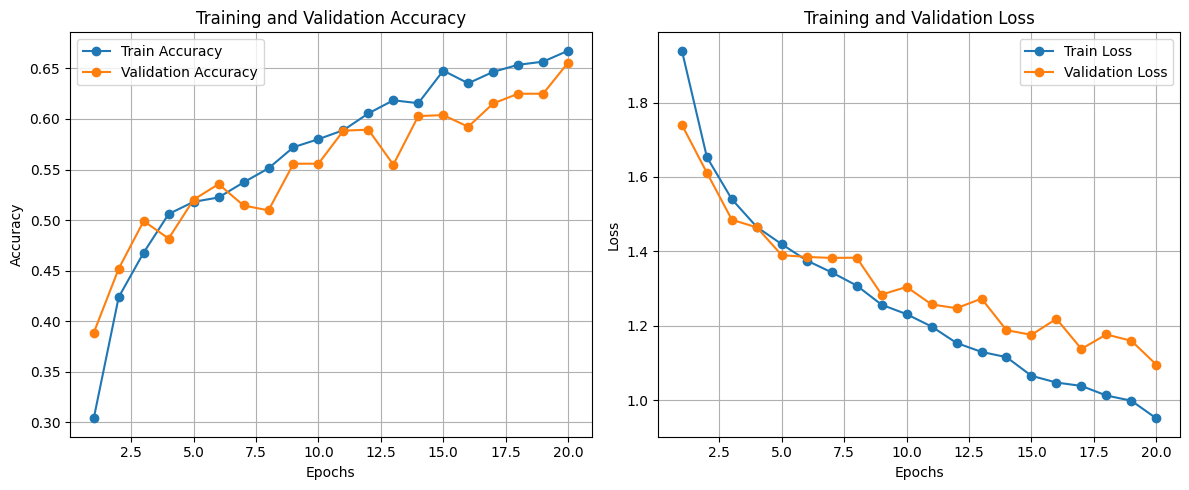

In [18]:
acc = history.history['accuracy']           # Eğitim doğruluğu
val_acc = history.history['val_accuracy']   # Doğrulama doğruluğu
loss = history.history['loss']              # Eğitim kaybı
val_loss = history.history['val_loss']      # Doğrulama kaybı

# Epoch sayısı
epochs = range(1, len(acc) + 1)

# Doğruluk grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [19]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test doğruluğu: {test_acc*100:.2f}%")
print(f"Test kaybı: {test_loss*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6712 - loss: 1.0079
Test doğruluğu: 66.62%
Test kaybı: 100.70%


### Çıktı Analizi
Bu kod parçacığı, eğitim tamamlandıktan sonra test veri seti üzerinde modelin doğruluk (accuracy) ve kayıp (loss) değerlerini değerlendirmek için kullanılır. Kodun çıktısı, modelin test veri seti üzerindeki performansını gösterir.

In [21]:
# Modeli kaydetme
model.save('model.h5')  
print("kaydedildi.")

kaydedildi.
